  
 ....reading fort.64 (LW)
       nlat= 64 nlon= 128 nlev= 40
       END OF FILE: DONE
(8192, 3)
LW (128, 64)
  
 ....reading fort.65 (SW)
       nlat= 64 nlon= 128 nlev= 40
       END OF FILE: DONE
(8192, 3)
SW (128, 64)
  
 ....reading fort.66 (Total)
       nlat= 64 nlon= 128 nlev= 40
       END OF FILE: DONE
(8192, 3)
tot (128, 64)
******************************
Total Integrated Output (W):
  LW: 2.7899891452973143e+18
  SW: 174316292811333.75
 sum: 2.7901634615901256e+18
  Net: -1.1843495046357437e+18 -9413436.89
-------------------------------
 Dayside Integrated Output (W):
  LW: 1.373202370103191e+18
  SW: 85795760870503.0
 sum: 1.3732881658640614e+18
******************************


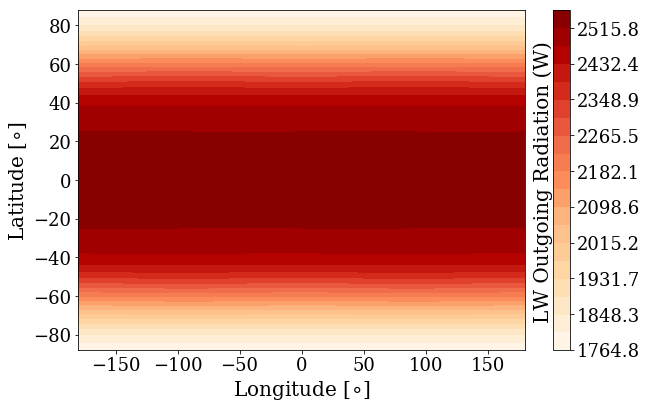

   ...calc levels not working, autogen...


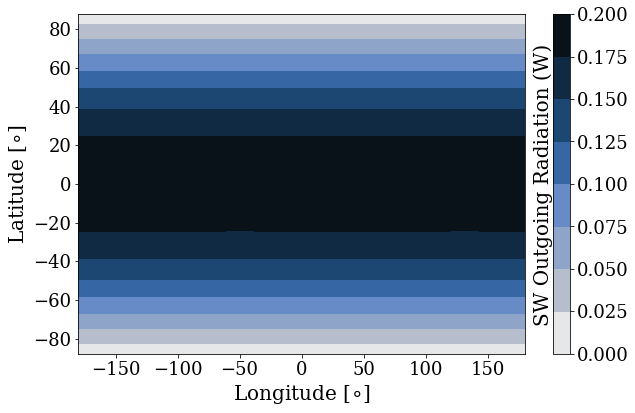

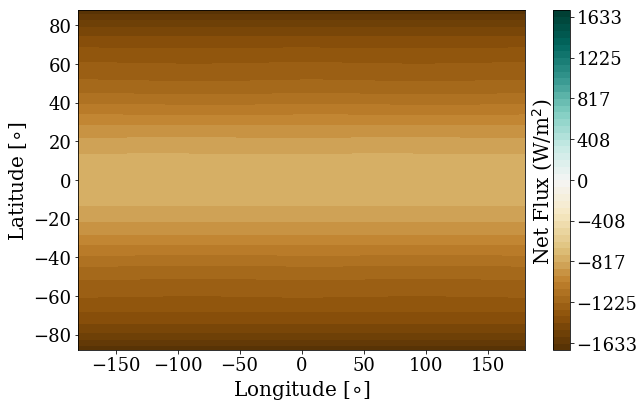

******************************
Total Integrated Input - ACTUAL (W):
  SW: 1.6058139569543818e+18
 O/I: 173.75 %
******************************


In [18]:
import numpy as np

from igcm_olr_func import igcm_olr
%matplotlib inline

oom=0
p0=2.0
radea=1.5*6.37*10**6
base_flux=0.087#0.4

#path='/Users/ermay/Desktop/GCM_plots/Files/'
path='/Users/ermay/Documents/GradSchool/Research_Surface/GCM_plots/Files/'
#runname='CBinary/'
#runname='FiducialPlanet/Model4/L10/T42/P0_001'
#runname='FiducialPlanet/Model3/L30/P0_195'
#runname='FiducialPlanet/Model3/L40/P0_300'
#runname='FiducialPlanet/Model2/P0_95'
#runname='FiducialPlanet/PostSurf/RESTART/'#VarTdiss/td_005'#Model4/Test_New/'#/L10/T42/P0_050'
#runname='EARTH_T63/'
#runname='Hayley/Slow/'

#runname='FiducialPlanet_NEW/Model3/P0_300'
runname='FiducialPlanet_NEW/Model2/P0_9'

makeplot=True
saveplot=True
LastOrb=False
savenamelw=path+runname+'/F_outgoing_lw.png'
savenamesw=path+runname+'/F_outgoing_sw.png'
savenameto=path+runname+'/F_net.png'
both=True #true to plot SW and LW, False for only lW
total=True


data_lw,data_sw,data_net,total_lw,total_sw,total_net,lon_arr,lat_arr=igcm_olr(path,runname,oom,p0,radea,makeplot, saveplot,savenamelw,savenamesw,savenameto,both,total,LastOrb)


import pickle


if LastOrb==True:
    pickle.dump(total_lw, open(path+runname+'/LW_total_lo.txt', 'wb'))
    pickle.dump(total_sw, open(path+runname+'/SW_total_lo.txt', 'wb'))
    pickle.dump(data_lw, open(path+runname+'/LWE_lo.txt','wb'))
    pickle.dump(data_sw, open(path+runname+'/SWE_lo.txt','wb'))
    long_avg_lwh=np.nanmedian(data_lw,axis=0)
    long_avg_swh=np.nanmedian(data_sw,axis=0)
    #pickle.dump(long_avg_net, open(path+runname+'/NET_avrg_lo.txt','wb'))#
    pickle.dump(long_avg_lwh, open(path+runname+'/LWE_avrg_lo.txt','wb'))
    pickle.dump(long_avg_swh, open(path+runname+'/SWE_avrg_lo.txt','wb'))
    if total==True:
        long_avg_net=np.nanmedian(data_net,axis=0)
        pickle.dump(long_avg_net, open(path+runname+'/NET_avrg.txt','wb'))
else:
    pickle.dump(total_lw, open(path+runname+'/LW_total.txt', 'wb'))
    pickle.dump(total_sw, open(path+runname+'/SW_total.txt', 'wb'))
    long_avg_lwh=np.nanmedian(data_lw,axis=0)
    long_avg_swh=np.nanmedian(data_sw,axis=0)
    pickle.dump(long_avg_lwh, open(path+runname+'/LWE_avrg.txt','wb'))
    pickle.dump(long_avg_swh, open(path+runname+'/SWE_avrg.txt','wb'))
    if total==True:
        long_avg_net=np.nanmedian(data_net,axis=0)
        pickle.dump(long_avg_net, open(path+runname+'/NET_avrg.txt','wb'))

# # read object from file
# a = pickle.load(open(path+runname+'/LW_total.txt', 'rb'))
# b = pickle.load(open(path+runname+'/SW_total.txt', 'rb'))

#total_net=incoming-outsw+incomlw-outlw
incoming_actual=total_net+total_sw+total_lw

print '******************************'
print 'Total Integrated Input - ACTUAL (W):'
print '  SW:', incoming_actual
print ' O/I:', np.round(100.*(np.nansum([total_sw,total_lw])/(incoming_actual+base_flux)),2),'%'
print '******************************'


In [112]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
#%matplotlib inline
from matplotlib.font_manager import FontProperties

params = {'font.family': 'serif',}
matplotlib.rcParams.update(params)


path='/Users/ermay/Documents/GradSchool/Research_Surface/GCM_plots/Files/'

runpath4='FiducialPlanet_NEW/Model4/'#L10/T42/'
runs4_n=np.array(['P0_001','P0_005','P0_010','P0_015','P0_020'])
runs4_l=['0.01 bars','0.05 bars','0.10 bars', '0.15 bars','0.20 bars']

sw_4=np.empty([len(runs4_l)])*np.nan
lw_4=np.empty([len(runs4_l)])*np.nan
for ri,r in enumerate(runs4_n):
    tp=path+runpath4+str(r)
    sw_4[ri]=pickle.load(open(tp+'/SW_total.txt', 'rb'))
    lw_4[ri]=pickle.load(open(tp+'/LW_total.txt', 'rb'))
    
####################

runpath3a='FiducialPlanet_NEW/Model3/'#L30/'
runs3_na=np.array(['P0_025','P0_050','P0_075','P0_100','P0_150'])#,'P0_170','P0_190','P0_195'])
runs3_la=['0.25 bars','0.50 bars','0.75 bars', '1.00 bars','1.50 bars']#,'1.70 bars','1.90 bars','1.95 bars']

sw_3a=np.empty([len(runs3_la)])*np.nan
lw_3a=np.empty([len(runs3_la)])*np.nan
for ri,r in enumerate(runs3_na):
    tp=path+runpath3a+str(r)
    sw_3a[ri]=pickle.load(open(tp+'/SW_total.txt', 'rb'))
    lw_3a[ri]=pickle.load(open(tp+'/LW_total.txt', 'rb'))
    
####################

runpath3b='FiducialPlanet_NEW/Model3/'#L40/'
runs3_nb=np.array(['P0_200','P0_205','P0_210'])#,'P0_230','P0_250','P0_300'])
runs3_lb=['2.00 bars','2.05 bars','2.10 bars']#, '2.30 bars','2.50 bars','3.00 bars']

sw_3b=np.empty([len(runs3_lb)])*np.nan
lw_3b=np.empty([len(runs3_lb)])*np.nan
for ri,r in enumerate(runs3_nb):
    tp=path+runpath3b+str(r)
    sw_3b[ri]=pickle.load(open(tp+'/SW_total.txt', 'rb'))
    lw_3b[ri]=pickle.load(open(tp+'/LW_total.txt', 'rb'))

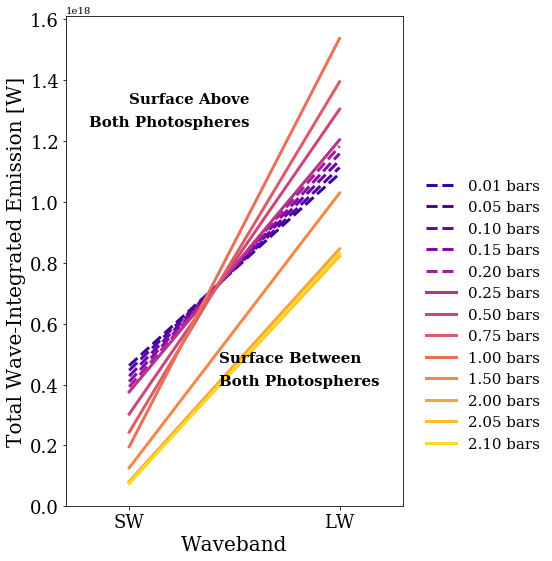

In [113]:
plt.figure(figsize=(8.5,8))
plt.gcf().subplots_adjust(bottom=0.10,top=0.95,left=0.15,right=0.70)

color_list = plt.cm.plasma(np.linspace(0., 1, len(runs4_n)+len(runs3_na)+len(runs3_nb)+2))
for ri,r in enumerate(runs4_n):
    plt.plot([1,2],[sw_4[ri],lw_4[ri]],linewidth=3.0,linestyle='--',color=color_list[ri+1],label=runs4_l[ri])
                             
for ri,r in enumerate(runs3_na):
    plt.plot([1,2],[sw_3a[ri],lw_3a[ri]],linewidth=3.0,linestyle='-',color=color_list[ri+1+len(runs4_n)],label=runs3_la[ri])

for ri,r in enumerate(runs3_nb):
    plt.plot([1,2],[sw_3b[ri],lw_3b[ri]],linewidth=3.0,linestyle='-',color=color_list[ri+1+len(runs4_n)+len(runs3_na)],label=runs3_lb[ri])


plt.ylabel('Total Wave-Integrated Emission [W]',fontsize=20)
plt.yticks(fontsize=18)

plt.xlabel('Waveband',fontsize=20)
plt.xticks([1.0,2.0],['SW','LW'], fontsize=18)
plt.xlim(0.7,2.3)

#plt.legend(loc='center left',frameon=False,fontsize=15)
plt.legend(loc=(1.05,0.10),frameon=False,fontsize=15)

plt.figtext(0.45,0.80,'Surface Above',fontsize=15,fontweight='bold',color='black',ha='right')
plt.figtext(0.45,0.76,'Both Photospheres',fontsize=15,fontweight='bold',color='black',ha='right')

plt.figtext(0.40,0.35,'Surface Between',fontsize=15,fontweight='bold',color='black',ha='left')
plt.figtext(0.40,0.31,'Both Photospheres',fontsize=15,fontweight='bold',color='black',ha='left')

plt.savefig(path+runpath4+'/Simp_Spec.pdf')
plt.savefig(path+runpath3a+'/Simp_Spec.pdf')
plt.savefig(path+runpath3b+'/Simp_Spec.pdf')

    

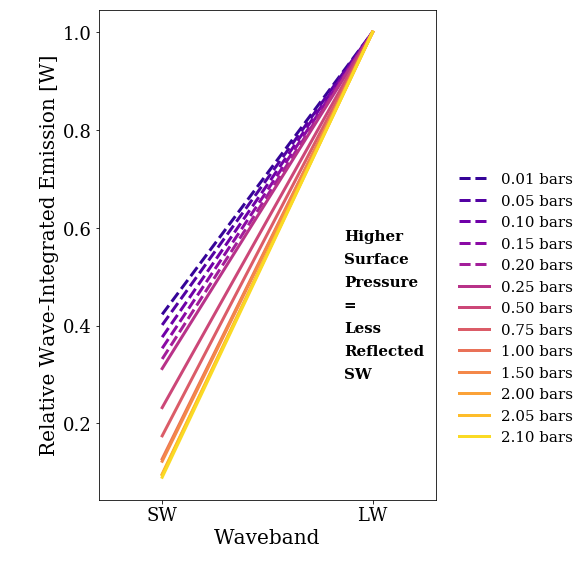

In [120]:
plt.figure(figsize=(8.5,8))
plt.gcf().subplots_adjust(bottom=0.10,top=0.95,left=0.15,right=0.70)

color_list = plt.cm.plasma(np.linspace(0., 1, len(runs4_n)+len(runs3_na)+len(runs3_nb)+2))
for ri,r in enumerate(runs4_n):
    plt.plot([1,2],[sw_4[ri]/lw_4[ri],lw_4[ri]/lw_4[ri]],linewidth=3.0,linestyle='--',color=color_list[ri+1],label=runs4_l[ri])
                             
for ri,r in enumerate(runs3_na):
    plt.plot([1,2],[sw_3a[ri]/lw_3a[ri],lw_3a[ri]/lw_3a[ri]],linewidth=3.0,linestyle='-',color=color_list[ri+1+len(runs4_n)],label=runs3_la[ri])

for ri,r in enumerate(runs3_nb):
    plt.plot([1,2],[sw_3b[ri]/lw_3b[ri],lw_3b[ri]/lw_3b[ri]],linewidth=3.0,linestyle='-',color=color_list[ri+1+len(runs4_n)+len(runs3_na)],label=runs3_lb[ri])


plt.ylabel('Relative Wave-Integrated Emission [W]',fontsize=20)
plt.yticks(fontsize=18)
#plt.yscale('log')

plt.xlabel('Waveband',fontsize=20)
plt.xticks([1.0,2.0],['SW','LW'], fontsize=18)
plt.xlim(0.7,2.3)

#plt.legend(loc='center left',frameon=False,fontsize=15)
plt.legend(loc=(1.05,0.10),frameon=False,fontsize=15)

#plt.figtext(0.45,0.80,'Surface Above',fontsize=15,fontweight='bold',color='black',ha='right')
#plt.figtext(0.45,0.76,'Both Photospheres',fontsize=15,fontweight='bold',color='black',ha='right')

#plt.figtext(0.40,0.40,'Surface Between',fontsize=15,fontweight='bold',color='black',ha='left')
#plt.figtext(0.40,0.36,'Both Photospheres',fontsize=15,fontweight='bold',color='black',ha='left')

# hap='left'
# xpt=0.55
# plt.figtext(xpt,0.55,'Higher'   ,fontsize=15,fontweight='bold',color='black',ha=hap)
# plt.figtext(xpt,0.51,'Surface'  ,fontsize=15,fontweight='bold',color='black',ha=hap)
# plt.figtext(xpt,0.47,'Pressure' ,fontsize=15,fontweight='bold',color='black',ha=hap)
# plt.figtext(xpt,0.43,'='        ,fontsize=15,fontweight='bold',color='black',ha=hap)
# plt.figtext(xpt,0.39,'Less'     ,fontsize=15,fontweight='bold',color='black',ha=hap)
# plt.figtext(xpt,0.35,'Reflected',fontsize=15,fontweight='bold',color='black',ha=hap)
# plt.figtext(xpt,0.31,'SW'       ,fontsize=15,fontweight='bold',color='black',ha=hap)

# plt.annotate(' ',xy=(1.8,0.031),xytext=(1.8,0.3),ha='center',
#              arrowprops=dict(width=2.0,facecolor='black'))


plt.savefig(path+runpath4+'/Simp_Spec_n.pdf')
plt.savefig(path+runpath3a+'/Simp_Spec_n.pdf')
plt.savefig(path+runpath3b+'/Simp_Spec_n.pdf')

    